# Model III Adaboost

In [22]:
!python ../lib/lib_install.py

numpy installed successfully.
pandas installed successfully.
scipy installed successfully.
matplotlib installed successfully.
seaborn installed successfully.
Failed to install scikit-learn.
plotly installed successfully.
ucimlrepo installed successfully.
missingno installed successfully.
imblearn installed successfully.
joblib installed successfully.


In [23]:
# Import libraries and modules

# Import the necessary libraries
import sys
import os

# Add the project directory to the sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import everything from lib_import.py, data_exploring.py, data_preprocessing.py 
from lib.lib_import import *
from src.data_preprocessing import *
from src.model_evaluation import *
from src.model_training import *

# Import the data
from data.data_extract import load_data

In [24]:
# Load the data

df_data = load_data()
df_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Data Preprocessing

In [25]:
df = df_data.copy()
df = preprocess(df)
df.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp,83311,13,Married,Exec-managerial,Married,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Now Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married,Handlers-cleaners,Married,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married,Prof-specialty,Married,Black,Female,0,0,40,Other,0
5,37,Private,284582,14,Married,Exec-managerial,Married,White,Female,0,0,40,United-States,0
6,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Other,0
7,52,Self-emp,209642,9,Married,Exec-managerial,Married,White,Male,0,0,45,United-States,1
8,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,13,Married,Exec-managerial,Married,White,Male,5178,0,40,United-States,1


In [26]:
df.duplicated().sum()

0

In [27]:
df.shape

(48544, 14)

In [28]:
cat_features = get_cat_features(df)
cont_features = get_cont_features(df)

In [29]:
df_train, df_test =seperate_train_test(df, random_state=42)

In [30]:
df_train_select = df_train.drop('>50K', axis=1)
df_test_select = df_test.drop('>50K', axis=1)
target_train = df_train['>50K']
target_test = df_test['>50K']

X_train = df_train_select.values
X_test = df_test_select.values

y_train = df_train['>50K'].values
y_test = df_test['>50K'].values

## Pipeline Adaboost

In [31]:
# Imputation et Normalisation
catgoricalPipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
    )

continuousPipeline = make_pipeline(
    StandardScaler()
)

preprocessor = make_column_transformer(
    (catgoricalPipeline, cat_features),
    (continuousPipeline, cont_features),
)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'education-num'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object'))])

In [32]:
adaboost = make_pipeline(preprocessor, AdaBoostClassifier(DecisionTreeClassifier(random_state=99)))
adaboost

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'education-num'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object'))])),
                ('adaboostclassifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=99)))])

### Entrainement et prediction

In [33]:
pipeline_fitted, y_test, y_pred = train_predict_model(adaboost, df_train, df_test, "adaboost")

Accuracy for adaboost: 0.8157379750746729


In [34]:
feature_importances_adaboost = pipeline_fitted.named_steps["adaboostclassifier"].feature_importances_

### Evaluation

Adaboost (pipeline 1)

Matrice de confusion:
[[6526  896]
 [ 893 1394]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7422
           1       0.61      0.61      0.61      2287

    accuracy                           0.82      9709
   macro avg       0.74      0.74      0.74      9709
weighted avg       0.82      0.82      0.82      9709
 

Exactitude: 81.573798 



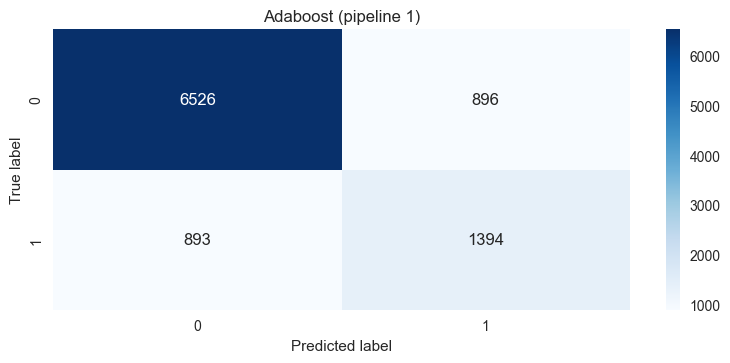

In [35]:
plot_confusion_matrix_sns(y_test, y_pred, 'Adaboost (pipeline 1)')

Text(0.5, 1.0, "Courbe d'apprentissage pour Adaboost")

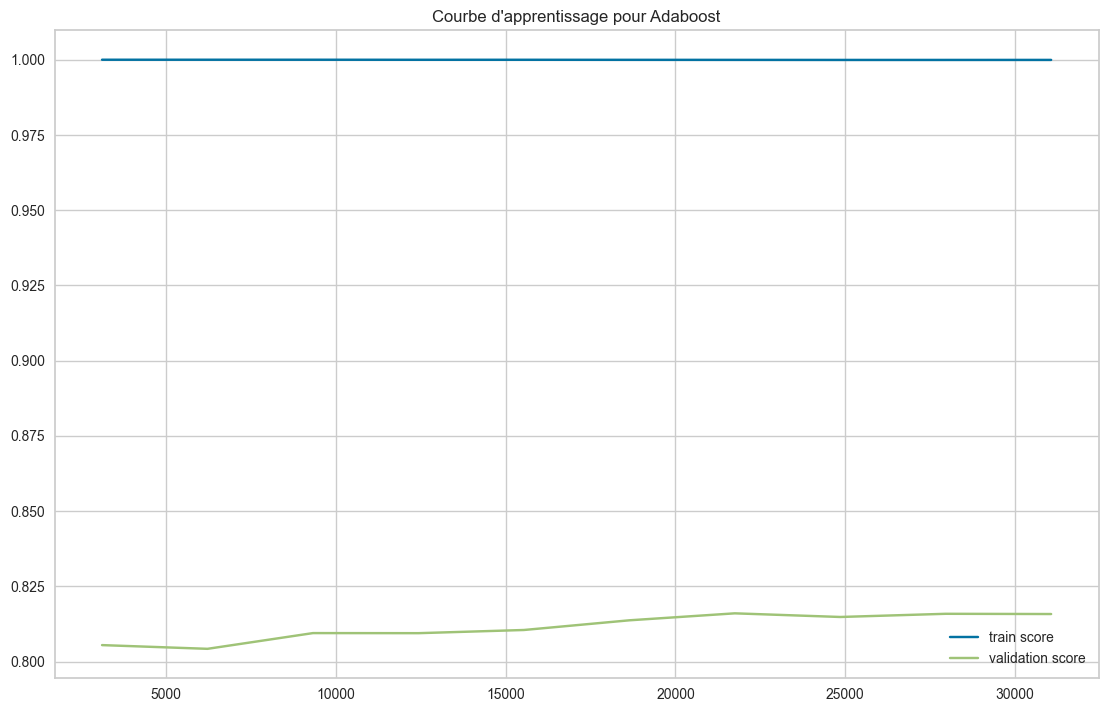

In [38]:
N, train_score, val_score = learning_curve(adaboost, df_train_select, y_train, 
                                           cv=5, scoring='f1_micro',
                                           train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.title("Courbe d'apprentissage pour Adaboost")


Le modèle est en sous apprentissage. Nous essayerons par la suite de l'optimiser

### Score d'importance des features

In [43]:
# Obtenir les données transformées
X_train_transformed = pipeline_fitted.named_steps['columntransformer'].transform(X_train)


ValueError: X has 13 features, but ColumnTransformer is expecting 14 features as input.

In [42]:
plt.rcParams["figure.figsize"] = (10,2)
df_feature_importances_adabost = pd.DataFrame(feature_importances_adaboost, index=df_train_select.columns)
df_feature_importances_adabost.T
N = len(df_train.columns)
score_importances_adaboost = (df_feature_importances_adabost .values.reshape(1,-1)[0])
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.bar(ind, score_importances_adaboost, width)
plt.ylabel('Scores')
plt.title('Score d importance par feature')
plt.xticks(ind, list(df_train.columns.values))
plt.show()

ValueError: Shape of passed values is (65, 1), indices imply (13, 1)

### Optimisation

## Gradient Boosting